In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import scipy.integrate
import astropy
from astropy.cosmology import LambdaCDM

NameError: name 'xl' is not defined

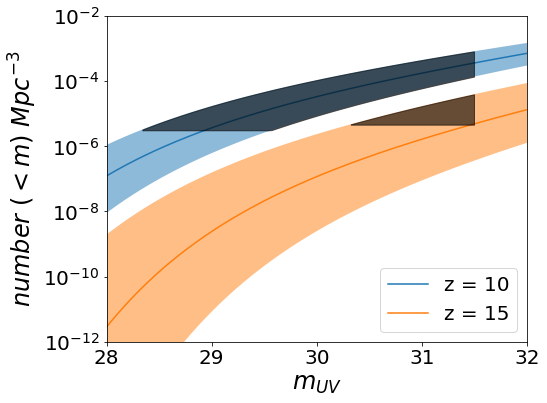

In [2]:
z_vals = [10, 15] # Redshifts to plot
cosmo = LambdaCDM(H0=70, Om0=0.3, Ode0=0.7) # Define cosmology
M = np.linspace(-30, 0, 1000) # Range of absolute magnitudes
ABmax = 31.5 # Max magnitude JWST can see
tot_sky = 41253. # Total square degrees in the sky
survey_area = 0.05556 # Survey area in square degrees
num_gal = 1 # Minimum number of galaxies needed within the survey area

plt.figure(figsize = (8, 6))
plt.rcParams.update({'font.size': 20})

for z in z_vals:
    
    # Convert from absolute to apparent magnitude, find volume within 1 redshift
    
    data = np.loadtxt("erb2010_continuum.dat")
    x = data[:,0]
    y = data[:,1] * x**2 / 3.e18
#     m = M + cosmo.distmod(z).value+2.5 * np.log10(y[x==1605]/y[x==1505])
    
    m = M + cosmo.distmod(z).value
    vol = cosmo.comoving_volume(z + 0.5).value - cosmo.comoving_volume(z - 0.5).value
    
    # Extrapolating Schecter fit parameters to z = 15 using the center fit value
    
    Ms = -20.95 + 0.01 * (z - 6)
    p = 0.47 * 10**(-0.27 * (z - 6)) * 10**(-3)
    a = -1.87 - 0.1 * (z - 6)
    LF_center = np.log(10)/2.5 * p * (10**(0.4 * (Ms - M)))**(a+1) * np.exp(-10**(0.4 * (Ms - M)))
    int_center = scipy.integrate.cumtrapz(LF_center, m)

    # Extrapolating Schecter fit parameters to z = 15 using the error bounds that maximize number of galaxies
    
    Ms = -20.95 - 0.1 + (0.01 - 0.06) * (z - 6)
    p = (0.47 + 0.11) * 10**((-0.27+0.05) * (z - 6)) * 10**(-3)
    a = (-1.87+0.05) + (-0.1 + 0.03) * (z - 6)
    LF_max = np.log(10)/2.5 * p * (10**(0.4 * (Ms - M)))**(a+1) * np.exp(-10**(0.4 * (Ms - M)))
    int_max = scipy.integrate.cumtrapz(LF_max, m)

    # Extrapolating Schecter fit parameters to z = 15 using the error bounds that minimize number of galaxies

    Ms = -20.95 + 0.1 + (0.01 + 0.06) * (z - 6)
    p = (0.47 - 0.1) * 10**((-0.27-0.05) * (z - 6)) * 10**(-3)
    a = (-1.87-0.05) + (-0.1 - 0.03) * (z - 6)
    LF_min = np.log(10)/2.5 * p * (10**(0.4 * (Ms - M)))**(a+1) * np.exp(-10**(0.4 * (Ms - M)))
    int_min = scipy.integrate.cumtrapz(LF_min, m)

    # Plot center line
    plt.plot(m[:-1], int_center, label = "z = " + str(z))
    
    # Plot filled error bounds
    m = m[:-1]
    plt.fill_between(m, int_min, int_max, alpha = 0.5)
    
    # Find region of plot that would be visible to JWST and fill
    nmin = num_gal * tot_sky / vol / survey_area
    m_new = m[m<ABmax]
    int_max_new = int_max[m<ABmax]
    int_min_new = int_min[m<ABmax]
    m = m_new[int_max_new > nmin]
    int_max = int_max_new[int_max_new > nmin]
    int_min = int_min_new[int_max_new > nmin]

    l = len(m)
    nmin_array = np.full(l, nmin)
    lower = np.maximum(nmin_array, int_min)
    
    plt.fill_between(m, lower, int_max, alpha = 0.6, color = 'k', zorder=20)

    plt.yscale("Log")
    plt.xlim(28, 32)
    plt.ylim(10**-12, 10**-2)
    plt.legend(loc = 'lower right')
    plt.xlabel(r'$m_{UV}$', fontsize = 24);
    plt.ylabel(r"$number \ (< m) \ Mpc^{-3}$", fontsize = 24);
    
plt.tight_layout()

plt.rc('font', family='serif')
plt.rc('text', usetex=True)

plt.xlim(xl, xu)
plt.ylim(yl, yu)
plt.axhline(y = nmin, color = 'k', xmin = 0, xmax = (ABmax - xl)/(xu-xl))
plt.axvline(x = ABmax, color = 'k', ymin = (np.log10(nmin)-np.log10(yl))/(np.log10(yu)-np.log10(yl)), ymax = 1)

# plt.savefig("LF1600.pdf")

In [ ]:
z_vals = [10, 11, 12, 13, 14, 15] # Redshifts to plot
cosmo = LambdaCDM(H0=70, Om0=0.3, Ode0=0.7) # Define cosmology
M = np.linspace(-30, 0, 1000) # Range of absolute magnitudes
ABmax = 31.5 # Max magnitude JWST can see
tot_sky = 41253. # Total square degrees in the sky
survey_area = 0.05556 # Survey area in square degrees
num_gal = 1 # Minimum number of galaxies needed within the survey area
dz = 0.5 # Depth from center redshift value for calculating volume

plt.figure(figsize = (8, 6))
plt.rcParams.update({'font.size': 20})

for z in z_vals:
    
    # Convert from absolute to apparent magnitude, find volume within 1 redshift
    
    data = np.loadtxt("erb2010_continuum.dat")
    x = data[:,0]
    y = data[:,1] * x**2 / 3.e18
#     m = M + cosmo.distmod(z).value+2.5 * np.log10(y[x==1605]/y[x==1505])
    
    m = M + cosmo.distmod(z).value
    vol = cosmo.comoving_volume(z + dz).value - cosmo.comoving_volume(z - dz).value
    
    # Extrapolating Schecter fit parameters to z = 15 using the center fit value
    
    Ms = -20.95 + 0.01 * (z - 6)
    p = 0.47 * 10**(-0.27 * (z - 6)) * 10**(-3)
    a = -1.87 - 0.1 * (z - 6)
    LF_center = np.log(10)/2.5 * p * (10**(0.4 * (Ms - M)))**(a+1) * np.exp(-10**(0.4 * (Ms - M)))
    int_center = scipy.integrate.cumtrapz(LF_center, m)

    # Plot center line
    plt.plot(m[:-1], int_center, label = "z = " + str(z))
    

plt.yscale("Log")

xl = 27
xu = 34
yl = 10**-9
yu = 10**-3

plt.xlim(xl, xu)
plt.ylim(yl, yu)
plt.axhline(y = nmin, color = 'k', xmin = 0, xmax = (ABmax - xl)/(xu-xl))
plt.axvline(x = ABmax, color = 'k', ymin = (np.log10(nmin)-np.log10(yl))/(np.log10(yu)-np.log10(yl)), ymax = 1)

plt.legend(loc = 'lower right')
plt.xlabel(r'$m_{UV}$', fontsize = 24);
plt.ylabel(r"$number \ (< m) \ Mpc^{-3}$", fontsize = 24);
    
plt.tight_layout()
plt.rc('font', family='serif')
plt.rc('text', usetex=True)

In [ ]:
cosmo = LambdaCDM(H0=70, Om0=0.3, Ode0=0.7) # Define cosmology
M = np.linspace(-30, 0, 1000) # Range of absolute magnitudes
ABmax = 26.5 # Max magnitude JWST can see
tot_sky = 41253. # Total square degrees in the sky
survey_area = 40. # Survey area in square degrees
num_gal = 1 # Minimum number of galaxies needed within the survey area
dz = 0.5 # Depth from center redshift value for calculating volume

plt.figure(figsize = (8, 6))
plt.rcParams.update({'font.size': 20})

z = 8


# Extrapolating Schecter fit parameters to z = 15 using the center fit value

Ms = -20.95 + 0.01 * (z - 6)
p = 0.47 * 10**(-0.27 * (z - 6)) * 10**(-3)
a = -1.87 - 0.1 * (z - 6)
LF_center = np.log(10)/2.5 * p * (10**(0.4 * (Ms - M)))**(a+1) * np.exp(-10**(0.4 * (Ms - M)))

plt.plot(M, LF_center, label = "z = " + str(z))


plt.yscale("Log")
plt.xlim(-25, -17)
plt.ylim(10**-10, 10**-2)
# plt.legend(loc = 'lower right')
# plt.xlabel(r'$m_{UV}$', fontsize = 24);
# plt.ylabel(r"$number \ (< m) \ Mpc^{-3}$", fontsize = 24);

plt.axvline(x = 26.5 - cosmo.distmod(z).value, color = "k")

plt.xticks(np.arange(-25, -17, step=1));
plt.tight_layout()

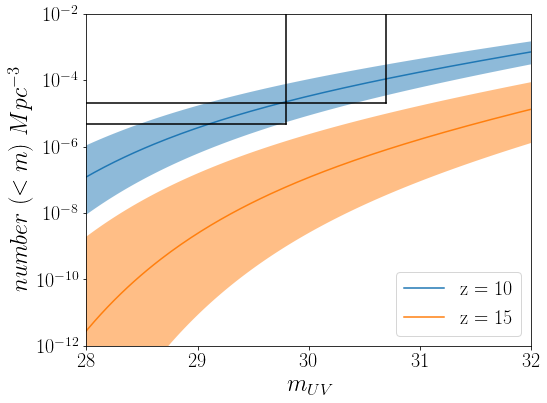

In [3]:
z_vals = [10,15] # Redshifts to plot
cosmo = LambdaCDM(H0=70, Om0=0.3, Ode0=0.7) # Define cosmology
M = np.linspace(-30, 0, 1000) # Range of absolute magnitudes
tot_sky = 41253. # Total square degrees in the sky
num_gal = 1 # Minimum number of galaxies needed within the survey area

ABmax = 30.7
survey_area = 46./3600

plt.figure(figsize = (8, 6))
plt.rcParams.update({'font.size': 20})
plt.yscale("Log")
plt.xlabel(r'$m_{UV}$', fontsize = 24);
plt.ylabel(r"$number \ (< m) \ Mpc^{-3}$", fontsize = 24);

xl = 28
xu = 32
yl = 10**-12
yu = 10**-2

plt.xlim(xl, xu)
plt.ylim(yl, yu)


for z in z_vals:
    
    # Convert from absolute to apparent magnitude, find volume within 1 redshift
    
    data = np.loadtxt("erb2010_continuum.dat")
    x = data[:,0]
    y = data[:,1] * x**2 / 3.e18
#     m = M + cosmo.distmod(z).value+2.5 * np.log10(y[x==1605]/y[x==1505])
    
    m = M + cosmo.distmod(z).value
    vol = cosmo.comoving_volume(z + 0.5).value - cosmo.comoving_volume(z - 0.5).value
    
    # Extrapolating Schecter fit parameters to z = 15 using the center fit value
    
    Ms = -20.95 + 0.01 * (z - 6)
    p = 0.47 * 10**(-0.27 * (z - 6)) * 10**(-3)
    a = -1.87 - 0.1 * (z - 6)
    LF_center = np.log(10)/2.5 * p * (10**(0.4 * (Ms - M)))**(a+1) * np.exp(-10**(0.4 * (Ms - M)))
    int_center = scipy.integrate.cumtrapz(LF_center, m)

    # Extrapolating Schecter fit parameters to z = 15 using the error bounds that maximize number of galaxies
    
    Ms = -20.95 - 0.1 + (0.01 - 0.06) * (z - 6)
    p = (0.47 + 0.11) * 10**((-0.27+0.05) * (z - 6)) * 10**(-3)
    a = (-1.87+0.05) + (-0.1 + 0.03) * (z - 6)
    LF_max = np.log(10)/2.5 * p * (10**(0.4 * (Ms - M)))**(a+1) * np.exp(-10**(0.4 * (Ms - M)))
    int_max = scipy.integrate.cumtrapz(LF_max, m)

    # Extrapolating Schecter fit parameters to z = 15 using the error bounds that minimize number of galaxies

    Ms = -20.95 + 0.1 + (0.01 + 0.06) * (z - 6)
    p = (0.47 - 0.1) * 10**((-0.27-0.05) * (z - 6)) * 10**(-3)
    a = (-1.87-0.05) + (-0.1 - 0.03) * (z - 6)
    LF_min = np.log(10)/2.5 * p * (10**(0.4 * (Ms - M)))**(a+1) * np.exp(-10**(0.4 * (Ms - M)))
    int_min = scipy.integrate.cumtrapz(LF_min, m)

    # Plot center line
    plt.plot(m[:-1], int_center, label = "z = " + str(z))
    
    # Plot filled error bounds
    m = m[:-1]
    plt.fill_between(m, int_min, int_max, alpha = 0.5)
    
    # Find region of plot that would be visible to JWST and fill
    nmin = num_gal * tot_sky / vol / survey_area
    m_new = m[m<ABmax]
    int_max_new = int_max[m<ABmax]
    int_min_new = int_min[m<ABmax]
    m = m_new[int_max_new > nmin]
    int_max = int_max_new[int_max_new > nmin]
    int_min = int_min_new[int_max_new > nmin]

    l = len(m)
    nmin_array = np.full(l, nmin)
    lower = np.maximum(nmin_array, int_min)
    
#     plt.fill_between(m, lower, int_max, alpha = 0.6, color = 'k', zorder=20)
    
plt.axhline(y = nmin, color = 'k', xmin = 0, xmax = (ABmax - xl)/(xu-xl))
plt.axvline(x = ABmax, color = 'k', ymin = (np.log10(nmin)-np.log10(yl))/(np.log10(yu)-np.log10(yl)), ymax = 1)
plt.tight_layout()

ABmax = 29.8
survey_area = 190./3600

for z in z_vals:
    
    # Convert from absolute to apparent magnitude, find volume within 1 redshift
    
    data = np.loadtxt("erb2010_continuum.dat")
    x = data[:,0]
    y = data[:,1] * x**2 / 3.e18
#     m = M + cosmo.distmod(z).value+2.5 * np.log10(y[x==1605]/y[x==1505])
    
    m = M + cosmo.distmod(z).value
    vol = cosmo.comoving_volume(z + 0.5).value - cosmo.comoving_volume(z - 0.5).value
    
    # Extrapolating Schecter fit parameters to z = 15 using the center fit value
    
    Ms = -20.95 + 0.01 * (z - 6)
    p = 0.47 * 10**(-0.27 * (z - 6)) * 10**(-3)
    a = -1.87 - 0.1 * (z - 6)
    LF_center = np.log(10)/2.5 * p * (10**(0.4 * (Ms - M)))**(a+1) * np.exp(-10**(0.4 * (Ms - M)))
    int_center = scipy.integrate.cumtrapz(LF_center, m)

    # Extrapolating Schecter fit parameters to z = 15 using the error bounds that maximize number of galaxies
    
    Ms = -20.95 - 0.1 + (0.01 - 0.06) * (z - 6)
    p = (0.47 + 0.11) * 10**((-0.27+0.05) * (z - 6)) * 10**(-3)
    a = (-1.87+0.05) + (-0.1 + 0.03) * (z - 6)
    LF_max = np.log(10)/2.5 * p * (10**(0.4 * (Ms - M)))**(a+1) * np.exp(-10**(0.4 * (Ms - M)))
    int_max = scipy.integrate.cumtrapz(LF_max, m)

    # Extrapolating Schecter fit parameters to z = 15 using the error bounds that minimize number of galaxies

    Ms = -20.95 + 0.1 + (0.01 + 0.06) * (z - 6)
    p = (0.47 - 0.1) * 10**((-0.27-0.05) * (z - 6)) * 10**(-3)
    a = (-1.87-0.05) + (-0.1 - 0.03) * (z - 6)
    LF_min = np.log(10)/2.5 * p * (10**(0.4 * (Ms - M)))**(a+1) * np.exp(-10**(0.4 * (Ms - M)))
    int_min = scipy.integrate.cumtrapz(LF_min, m)

    # Plot center line
#     plt.plot(m[:-1], int_center, label = "z = " + str(z))
    
    # Plot filled error bounds
    m = m[:-1]
#     plt.fill_between(m, int_min, int_max, alpha = 0.5)
    
    # Find region of plot that would be visible to JWST and fill
    nmin = num_gal * tot_sky / vol / survey_area
    m_new = m[m<ABmax]
    int_max_new = int_max[m<ABmax]
    int_min_new = int_min[m<ABmax]
    m = m_new[int_max_new > nmin]
    int_max = int_max_new[int_max_new > nmin]
    int_min = int_min_new[int_max_new > nmin]

    l = len(m)
    nmin_array = np.full(l, nmin)
    lower = np.maximum(nmin_array, int_min)
    
#     plt.fill_between(m, lower, int_max, alpha = 0.6, color = 'k', zorder=20)
    
plt.axhline(y = nmin, color = 'k', xmin = 0, xmax = (ABmax - xl)/(xu-xl))
plt.axvline(x = ABmax, color = 'k', ymin = (np.log10(nmin)-np.log10(yl))/(np.log10(yu)-np.log10(yl)), ymax = 1)
plt.tight_layout()

plt.legend(loc = 'lower right')


plt.rc('font', family='serif')
plt.rc('text', usetex=True)

# plt.savefig("LF1600.pdf")

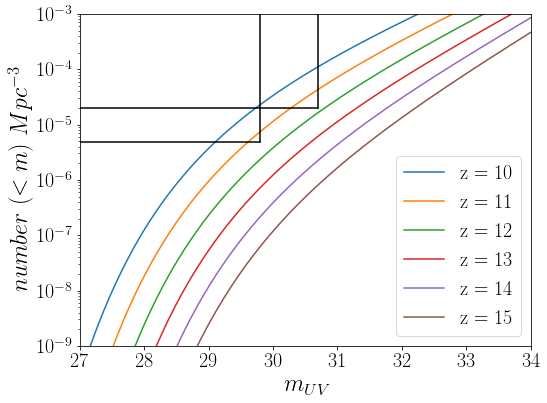

In [4]:
z_vals = [10, 11, 12, 13, 14, 15] # Redshifts to plot
cosmo = LambdaCDM(H0=70, Om0=0.3, Ode0=0.7) # Define cosmology
M = np.linspace(-30, 0, 1000) # Range of absolute magnitudes
ABmax = 31.5 # Max magnitude JWST can see
tot_sky = 41253. # Total square degrees in the sky
survey_area = 0.05556 # Survey area in square degrees
num_gal = 1 # Minimum number of galaxies needed within the survey area
dz = 0.5 # Depth from center redshift value for calculating volume

plt.figure(figsize = (8, 6))
plt.rcParams.update({'font.size': 20})

for z in z_vals:
    
    # Convert from absolute to apparent magnitude, find volume within 1 redshift
    
    data = np.loadtxt("erb2010_continuum.dat")
    x = data[:,0]
    y = data[:,1] * x**2 / 3.e18
#     m = M + cosmo.distmod(z).value+2.5 * np.log10(y[x==1605]/y[x==1505])
    
    m = M + cosmo.distmod(z).value
    vol = cosmo.comoving_volume(z + dz).value - cosmo.comoving_volume(z - dz).value
    
    # Extrapolating Schecter fit parameters to z = 15 using the center fit value
    
    Ms = -20.95 + 0.01 * (z - 6)
    p = 0.47 * 10**(-0.27 * (z - 6)) * 10**(-3)
    a = -1.87 - 0.1 * (z - 6)
    LF_center = np.log(10)/2.5 * p * (10**(0.4 * (Ms - M)))**(a+1) * np.exp(-10**(0.4 * (Ms - M)))
    int_center = scipy.integrate.cumtrapz(LF_center, m)

    # Plot center line
    plt.plot(m[:-1], int_center, label = "z = " + str(z))
    

plt.yscale("Log")

xl = 27
xu = 34
yl = 10**-9
yu = 10**-3

plt.xlim(xl, xu)
plt.ylim(yl, yu)

ABmax = 29.8
survey_area = 190./3600
nmin = num_gal * tot_sky / vol / survey_area
plt.axhline(y = nmin, color = 'k', xmin = 0, xmax = (ABmax - xl)/(xu-xl))
plt.axvline(x = ABmax, color = 'k', ymin = (np.log10(nmin)-np.log10(yl))/(np.log10(yu)-np.log10(yl)), ymax = 1)

ABmax = 30.7
survey_area = 46./3600
nmin = num_gal * tot_sky / vol / survey_area
plt.axhline(y = nmin, color = 'k', xmin = 0, xmax = (ABmax - xl)/(xu-xl))
plt.axvline(x = ABmax, color = 'k', ymin = (np.log10(nmin)-np.log10(yl))/(np.log10(yu)-np.log10(yl)), ymax = 1)

plt.legend(loc = 'lower right')
plt.xlabel(r'$m_{UV}$', fontsize = 24);
plt.ylabel(r"$number \ (< m) \ Mpc^{-3}$", fontsize = 24);
    
plt.tight_layout()
plt.rc('font', family='serif')
plt.rc('text', usetex=True)